# Spam Message Classification


## 1) Data Preprocessing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('spam.tsv',sep='\t')

# New Section

In [6]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


Check for NULL values


In [7]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
df.describe()
df['label'].value_counts() / len(df)*100

ham     86.593683
spam    13.406317
Name: label, dtype: float64

Balancing The dataset

In [9]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Filtering ham



In [10]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [11]:
ham.shape, spam.shape


((4825, 4), (747, 4))

Undersampling

In [12]:
ham = ham.sample(spam.shape[0])

In [13]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [14]:
data = ham.append(spam,ignore_index=True)

In [15]:
data.shape

(1494, 4)

In [16]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

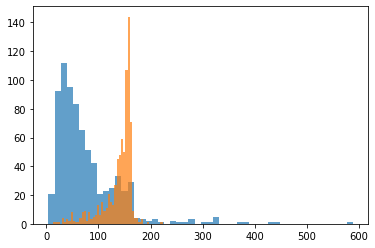

In [17]:
plt.hist(data[data['label'] == 'ham']['length'],bins=50,alpha=0.7)
plt.hist(data[data['label'] == 'spam']['length'],bins=50,alpha=0.7)
plt.show()

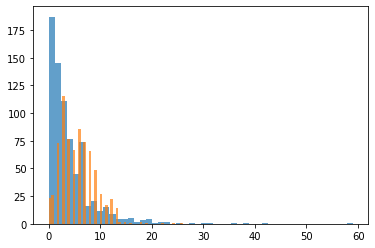

In [18]:
plt.hist(data[data['label'] == 'ham']['punct'],bins=50,alpha=0.7)
plt.hist(data[data['label'] == 'spam']['punct'],bins=50,alpha=0.7)
plt.show()

## 2) Test Train Split


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True)

In [21]:
X_train.shape

(1045,)

## 3) Building Model (Random Forest)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline


In [25]:
classifier = Pipeline([("tfidf",TfidfVectorizer()), ("classifier",RandomForestClassifier(n_estimators=100))])

In [26]:
classifier.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

## 4) Predict the results


In [29]:
y_pred = classifier.predict(X_test)

In [30]:
y_test,y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam',

In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [33]:
accuracy_score(y_test,y_pred)

0.9376391982182628

In [35]:
confusion_matrix(y_test,y_pred)

array([[224,   3],
       [ 25, 197]])

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       227
        spam       0.98      0.89      0.93       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449

